# Root finding for Lenard Jones potential

The Lenard-Jones potential is given as
$$V_{LJ} = 4\epsilon [\Big(\frac{\sigma}{r}\Big)^{12} - \Big(\frac{\sigma}{r}\Big)^{6}]$$
The values of r where this vanishes can be computed using the bisection method. 

Analytically, it is easily seen that the position where the LJ potential vanishes is at r = $\sigma$. Below, using the bisection method, the solution is found and verified. Solution will be considered in the units where $\sigma$ = 1 and $\epsilon$ = 1.

Again, analytically, the derivative of the potential is,
$$\frac{\partial V}{\partial r} = -\frac{24}{r}\epsilon[2\Big(\frac{\sigma}{r}\Big)^{12} - \Big(\frac{\sigma}{r}\Big)^{6}]$$

This vanishes when $(\sigma/r)^6 = 1/2$. For $\sigma$ = 1, we get r = 1.122 units.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.sparse import diags
%matplotlib inline

In [115]:
# Plot of the potential
def V_LJ(s,e,r): # Defining the potential
    return 4*e*((s/r)**12 - (s/r)**6)

def force(s,e,r): # Definition of force
    return (24/r)*e*(2*(s/r)**12 - (s/r)**6)

def plot_pot(s,e,ini,fin):
    # s = sigma
    # e = epsilon
    # ini = starting r
    # fin = final r
    
    V = []
    r = np.linspace(ini,fin,200)
    for i in r:
        V.append(V_LJ(s,e,i))
    plt.plot(r,V)
    plt.ylabel('$V_{LJ}$', fontsize = 13)
    plt.xlabel('r', fontsize = 13)
    plt.title('Lenard-Jones Potential', fontsize = 13)
    plt.plot(r,np.zeros(np.size(r)),'k')

def plot_force(s,e,ini,fin):
    F = []
    rf = np.linspace(ini,fin,200)
    for i in rf:
        F.append(force(s,e,i))
    plt.plot(rf,F)
    plt.ylabel('$F_{LJ}$', fontsize = 13)
    plt.xlabel('r', fontsize = 13)
    plt.title('Lenard-Jones Force', fontsize = 13)
    plt.plot(rf,np.zeros(np.size(rf)),'k')
    plt.ylim(-5,10)

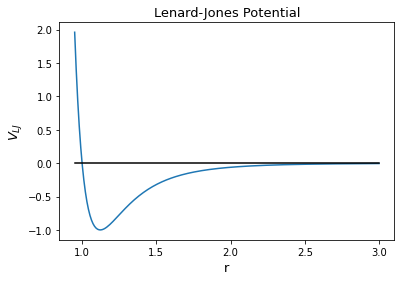

In [99]:
plot_pot(1,1,0.95,3)

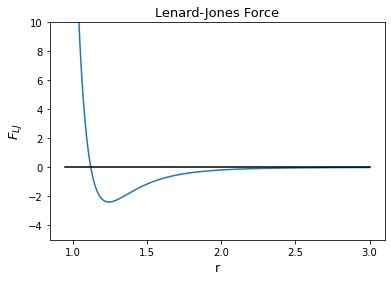

In [116]:
plot_force(1,1,0.95,3)

In [100]:
# Bisection method to find the roots.
def bisection(func,s,e,ini,fin,tol):
    # tol = tolerance
    
    # Root range
    a = ini 
    b = fin
    
    while (True):
        if (func(s,e,a)*func(s,e,b) > 0):
            print('Please give a correct range')
            break
        
        else:
            c = (a+b)/2
            temp_f = func(s,e,c)
            if (np.abs(temp_f) < tol):
                res = c
                break
            else:
                if (temp_f*func(s,e,b) < 0):
                    a = c
                elif (temp_f*func(s,e,a) < 0):
                    b = c
    return res

In [102]:
# Finding the root of potential with s = 1, e = 1
pot_0 = bisection(V_LJ,1,1,0.5,1.2,0.000000000001)

print('The potential is zero at r =',pot_0,'units')

The potential is zero at r = 0.9999999999999657 units


With a good precision, this value matches the expected r = $\sigma$ as in this case $\sigma$ is taken to be 1.

In [103]:
# Finding the root of force with s = 1, e = 1
f_0 = bisection(force,1,1,0.5,3,0.000000001)

print('The force is zero at r =',f_0,'units')

The force is zero at r = 1.1224620483044419 units


The root of force found in the above step matches with the analytical value with good precision. 

In [118]:
# Energy of the system at this minima for s = e = 1.

print('Energy of the system at the minima is',V_LJ(1,1,f_0),'in units where sigma = epsilon = 1')

Energy of the system at the minima is -1.0000000000000002 in units where sigma = epsilon = 1


The minimum energy required to tear the atom pair apart is negative of the minimum energy of the system. Analytically, it is when $(\sigma/r)^6 = 1/2$. Putting this in the energy equation, we get $V_{min}$ = -$\epsilon$. In our case, $\epsilon$ = 1 and hence, correctly, we got $V_{min}$ = -1 units. Therefore, 1 unit of energy required to tear the atom pair apart.

# Finite difference

The equation to solve is 
$$y'' + 3y' -5y = 7x$$
subject to the boudary condition $y(0)$ = -20 and $y(1)$ = 100. This can be solved using finite difference method. Discretizing the x domain (0,1) into N chunks of $\Delta x$ (with index i),
$$x_i = x_0 + i\Delta x$$

We have,
$$y'' = \frac{x_{i+1}-2x_i+x_{i-1}}{(\Delta x)^2}$$
$$y' = \frac{x_{i+1}-x_{i-1}}{2\Delta x}, \hspace{5mm} \text{central difference.}$$
Using these, we have,
$$y(x_{i+1})\Big(\frac{1}{(\Delta x)^2}+\frac{3}{2\Delta x}\Big) + y(x_i)\Big(-\frac{2}{(\Delta x)^2}-5\Big)+y(x_{i-1})\Big(\frac{1}{(\Delta x)^2}-\frac{3}{2\Delta x}\Big) = 7x_i$$
This can be written as a matrix equation with matrix A as,
$$\begin{pmatrix}
a_{11}&a_{12}&&&&\\
a_{21}&a_{22}&a_{23}&&&\\
&a_{32}&a_{33}&a_{34}&&\\
&&a_{43}&a_{44}&a_{45}&\\
&&&a_{54}&a_{55}&a_{56}
\end{pmatrix}
$$
with,
$$a_{n,n-1} = \frac{1}{(\Delta x)^2}-\frac{3}{2\Delta x}$$
$$a_{n,n} = -\frac{2}{(\Delta x)^2}-5$$
$$a_{n,n+1} = \frac{1}{(\Delta x)^2}+\frac{3}{2\Delta x}$$
This matrix is for N = 5 and can easily be extended. The following simulation is done for N = 100. Now, the above equation can be written as a matrix equation of the form,
$$A\vec{y}=\vec{b}$$
where $y_i$ = $y(x_i)$ and $b_i$ = $7x_i$. As we know y for i = 0, the first row and the first column of the matrix can be neglected provided $y_1$ is replaced by $y_1 - a_{11}y_0$. Similarly, y is known for i = N. Hence, the last row and the last column of the matrix can be neglected provided $y_{N-1}$ is replaced by $y_{N-1} - a_{NN+1}y_N$. This algorithm is implemented in the following code and the solution is plotted and some values of y are printed.

An accuracy of 4 significant digits is required in this case. Since for central difference, the accuracy goes as $O(\Delta x)^2$, considering $\Delta x$ to be 0.01 can give this accuracy. Hence, in the following function, I will take N = 101.

In [136]:
def fin_diff(N):
    # x grid
    x_grid = np.linspace(0,1,N)
    
    # delta x
    del_x = 1/(N-1)
    
    y = np.zeros(N)
    
    #Boundary Conditions
    y[0] = -20
    y[-1] = 100
    
    # tri diagonal matrix
    main = np.zeros(N-2)
    upper = np.zeros(N-3)
    lower = np.zeros(N-3)
    
    main[:] = -(2/(del_x**2)) - 5
    upper[:] = (1/(del_x**2)) + (3/(2*del_x))
    lower[:] = (1/(del_x**2)) - (3/(2*del_x))
    
    # This will compute the matrix A
    A = diags(
    diagonals=[main, lower, upper],
    offsets=[0, -1, 1], shape=(N-2,N-2),
    format='csr')
    print(A.todense())
    A = A.toarray()
    
    # Defining b
    b = np.zeros(N-2)
    b = b + 7*x_grid[1:-1]
    
    # Shifting the second and second last elements of b according to boundary conditions
    b[0] = b[0] - lower[0]*y[0]
    b[-1] = b[-1] - upper[-1]*y[-1]
    
    # Solving
    y[1:-1] = np.linalg.solve(A,b) # gives y in the equation y = Ab
    
    return [y,x_grid]

In [137]:
# Resulting array of y. Below printed is the matrix A.
result = fin_diff(101)

[[-20005.  10150.      0. ...      0.      0.      0.]
 [  9850. -20005.  10150. ...      0.      0.      0.]
 [     0.   9850. -20005. ...      0.      0.      0.]
 ...
 [     0.      0.      0. ... -20005.  10150.      0.]
 [     0.      0.      0. ...   9850. -20005.  10150.]
 [     0.      0.      0. ...      0.   9850. -20005.]]


Text(0.5, 0, 'x')

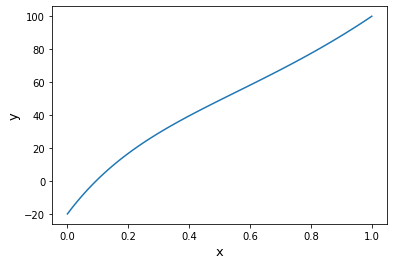

In [138]:
# Plot of y vs x
plt.plot(result[1],result[0])
plt.ylabel('y',fontsize = 13)
plt.xlabel('x',fontsize = 13)

This is the final plot of y(x)

In [140]:
# Printing some values of y
result[0][56:60]

array([54.50580455, 55.42082132, 56.33648725, 57.25324114])

It is clear that we get the result with good precision.

# Molecular dynamics simulation

In Assignment 6, we have performed a molecular dynamics simulation in 3 dimensions using Lenard-Jones potential and fcc lattice. In this problem, I choose to perform a molecular dynamics simulation in 2 dimensions with a square lattice. I will consider 6 $\times$ 6 unit cells with lattice constant a = 1. Lenard-Jones potential is again used.
$$V_{LJ} = 4\epsilon [\Big(\frac{\sigma}{r}\Big)^{12} - \Big(\frac{\sigma}{r}\Big)^{6}]$$

Sample cell of 6 $\times$ 6 unit cells is created. For periodic boundary condition, 8 adjacent cells are also considered. Periodic boundary conditions are required in order to simulate large periodic systems using just the 6 $\times$ 6 cell. Force acting on a particle will act from particles on the adjacent cells as well provided they are within the $r_c$ cut off. In the following simulation, all these things are taken care of. In this simulation, N V E are conserved.

In [3]:
a = 1
n = 6
A = (n**2)*(a**2)
N = (n**2)
Ti = 0.2

In [4]:
# Creating the square lattice
a1 = a * np.array([1,0])
a2 = a * np.array([0,1])
r = []
for i in range(6):
    for j in range(6):
        r.append(np.array([(i*a1[0]+j*a2[0])%(a*n),(i*a1[1]+j*a2[1])%(a*n)]))
r = np.array(r)

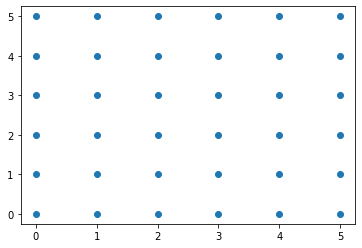

In [5]:
# 36 generated points of the sample box
plt.scatter(r[:,0],r[:,1])

In [6]:
# Generating velocity using Maxwell distribution
v = []
for i in range(N):
    vp = []
    for j in range(2):
        temp = np.random.normal(0,np.sqrt(Ti))
        vp.append(temp)
    v.append(np.array(vp))
v = np.array(v)

In [19]:
steps = 4000
de = 0.005 # delta t

rf = np.zeros((steps,N,2))
rf[0] = r
# rf stores the configuration of N particle at each time step

vf = np.zeros((steps,N,2))
vf[0] = v
# vf stores the velocity of each particle at each time step

rc = 2.5 # cut off

In [20]:
# For periodic boundary condition, the corresponding points on all the adjacent boxes are considered.
# Image lattices
# R_im takes a point from one sample cell to an adjacent one.

R_im = np.zeros((9,2))
vec = np.array((0,0))
R_im[0] = vec + a1*n*a
R_im[1] = vec + a1*n*a + a2*n*a
R_im[2] = vec + a2*n*a
R_im[3] = vec - a1*n*a + a2*n*a
R_im[4] = vec - a1*n*a
R_im[5] = vec - a1*n*a - a2*n*a
R_im[6] = vec - a2*n*a
R_im[7] = vec + a1*n*a - a2*n*a
R_im[8] = vec

In [21]:
# Defining functions for energy and force.
def KE(v):
    # v - velocity of all particles
    return np.sum(v**2)/N

def PE_force(td,i_d):
    # ti = time index
    # i_d = particle index
    
    U_id = 0 # PE for particle index i_d
    force = np.zeros(2)
    
    d_arr = (rf[td] - rf[td][i_d])
    for j in range(N):
        R = R_im + d_arr[j]
        d2 = np.sum(R**2,axis = 1)
        m = np.argmin(d2)
        d = np.sqrt(np.min(d2))
        if (0 < d < rc):
            U_id = U_id + 4*((1/d)**12-(1/d)**6)
            force = force + (-(24/d**2)*(2*(1/d)**12 - (1/d)**6))*R[m]
    return [U_id,force]

In [22]:
# Initial values of energies, temperature and pressure
U = np.zeros(steps-1)
for i in range(N):
    U[0] = U[0] + PE_force(0,i)[0]
U[0] = U[0]/(2*N)

K = np.zeros(steps-1)
K[0] = KE(vf[0])

T = np.zeros(steps-1)
T[0] = (2/3)*K[0]

P = np.zeros(steps-1)
P[0] = (N/A)*T[0]

E = np.zeros(steps-1)
E[0] = K[0] + U[0]

In [23]:
# First iterate using verlet algorithm
for i in range(N):
    f = PE_force(0,i)[1]
    rm = rf[0][i] - vf[0][i]*de + (1/2)*f*de*de
    rf[1][i] = 2*rf[0][i] - np.array(rm) + f*de*de

rf = rf%(n*a)
# modulo function is used above for periodic boundary condition

In [24]:
def md_evolve(ind):
    # ti_: atom index
    # ii: time index

    ti_,ii = ind
    
    A = PE_force(ii,ti_)
    U_ = A[0]/(2*N)
    f_ = A[1]
    
    # The particles which cross the boundary should be taken care of.
    
    del_ = rf[ii][ti_]-rf[ii-1][ti_] ''' difference of position of a particle in adjacent time steps.
     This should not be > rc. Incase it is (happens only if a particle crosses boundary and is taken back in by 
     modulo function), it is subtracted by n*a. This will give the actual displacement happened in 
     that time step which is required in the verlet algorithm.'''
    
    for j in range(2):
        if(del_[j]**2>rc**2):
            
            del_[j] = np.sign(del_[j])*(np.abs(del_[j])-n*a)
            
    
    verlet_it = rf[ii][ti_] + del_ + f_*(de**2) # Verlet evolution
    vel = (del_ + (1/2)*f_*(de**2))/de
    
    return [verlet_it,U_,vel]

In [117]:
from multiprocess import Pool
import multiprocess

In [25]:
# This runs the code 4000 times to build the functions of Energy and Temperature.

# Multiprocessing is used to run this as it takes a lot of time.
st = []
for i in range(N):
    st.append((i,1))
    
# st is the array of tuples which is given as input to md_evolve in pool.map function. This is how pool.map takes values

for ti in range(1,steps-1):
    
    
    pool = Pool(processes=4)
    res = pool.map(md_evolve,st,chunksize=int(N/6.5))
    pool.close()
   
    
    for i in range(N):
        rf[ti+1][i] = res[i][0]
        vf[ti][i] = res[i][-1]
        st[i] = (i,ti+1)
    
    # We get the configurations at different time steps
    rf = rf%(n*a)
    
    U[ti] = np.sum(np.array(res)[:,1],dtype=object) 
    K[ti] = KE(vf[ti])
    T[ti] = (2/3)*K[ti]

# The note below is just a warning. The code runs fine.
# Please install 'multiprocess' (if not already there) to run this.

<ipython-input-25-3fe884806392>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  U[ti] = np.sum(np.array(res)[:,1],dtype=object)


Text(0.5, 1.0, 'Plot of Energies and Temperature with time')

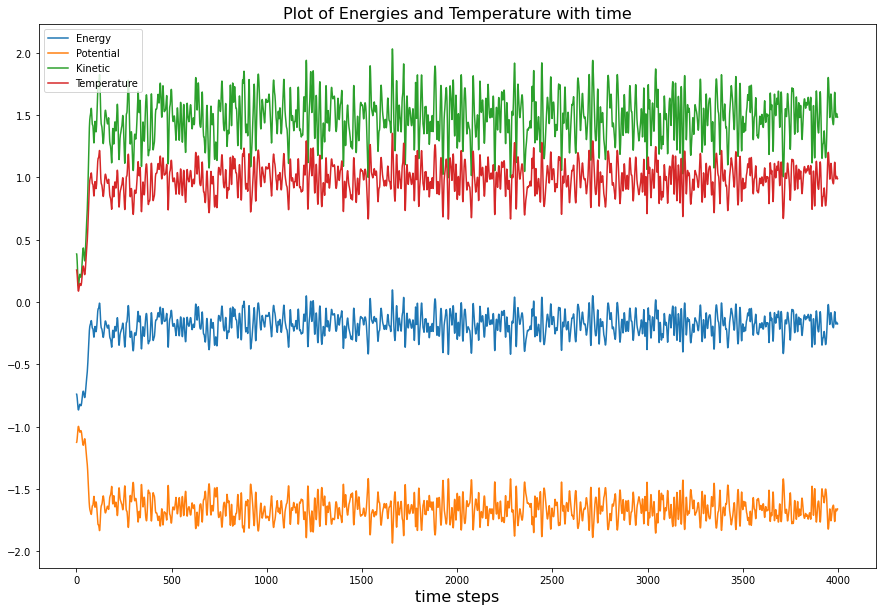

In [43]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
ts = np.linspace(1,steps-2,steps-1)
ax.plot(ts,U+K)
ax.plot(ts,U)
ax.plot(ts,K)
ax.plot(ts,T)
plt.legend(['Energy','Potential','Kinetic','Temperature'])
plt.xlabel('time steps',fontsize = 16)
plt.title('Plot of Energies and Temperature with time',fontsize = 16)

# Monte Carlo
# Part I

Part-I: Normal distribution and Gaussian distribution are defined by the same function which is
$$\omega(x) = \frac{1}{\sqrt{2\pi \sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$
with mean $\mu$ and standard deviation $\sigma$. In this part, I will generate distributions of different $\sigma$'s and $\mu$'s using the metropolis algorithm and compare. Different distributions to be considered are,
1. $\mu$ = 0, $\sigma$ = $\sqrt{2}$
2. $\mu$ = 0, $\sigma$ = 1
3. $\mu$ = 1, $\sigma$ = 2

In the below code, the weight functions are defined and the metropolis algorithm for generating the distribution is defined.

In [45]:
# Generating wrt w(x)
def w(s,m,x):
    # s = sigma
    # m = mu
    
    return (1/np.sqrt(2*np.pi*s*s))*np.e**(-((x-m)**2)/(2*s*s))

def metropolis(N,d,ini,weight,s,m): # Function for the metropolis algorithm
    # This function generates points distributed by the weight function
    # N = number of iterations
    # d = step size
    # ini = starting point
    
    x_fin = [] # defining the final list of generated points
    x_fin.append(ini)
    c_acc = 0 # acceptance ratio
    
    for i in range(N):
        temp = np.random.uniform(0,1)
        if (temp < 0.5): # random walk
            x_temp = x_fin[i] - d
        elif (temp > 0.5 or temp == 0.5):
            x_temp = x_fin[i] + d
        
        r = weight(s,m,x_temp)/weight(s,m,x_fin[i]) 
        # metropolis algorithm
        if (r > 1 or r == 1):
            c_acc = c_acc + 1
            x_fin.append(x_temp)
            continue
        if (r < 1):
            eta = np.random.uniform(0,1)
            if (r > eta):
                c_acc = c_acc + 1
                x_fin.append(x_temp)
            if (r < eta):
                x_fin.append(x_fin[i])
    
    acc_ratio = c_acc/len(x_fin)
    
    return np.array([np.array(x_fin),acc_ratio],dtype = object)

In [85]:
x1 = metropolis(10000,0.2,0,w,np.sqrt(2),0)[0]
x2 = metropolis(10000,0.2,0,w,1,0)[0]
x3 = metropolis(10000,0.2,0,w,2,1)[0]

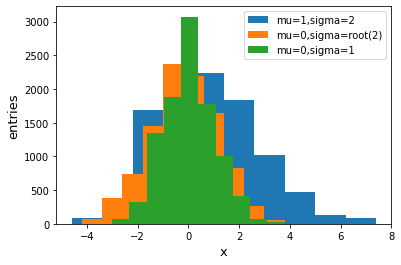

In [88]:
plt.hist(x3)
plt.hist(x1)
plt.hist(x2)
plt.xlabel('x',fontsize = 13)
plt.ylabel('entries',fontsize = 13)
plt.legend(['mu=1,sigma=2','mu=0,sigma=root(2)','mu=0,sigma=1'])

Normal or Gaussian distribution has to be compared with the exponential distribution which is given by the function,
$$\omega(x) = \lambda e^{-\lambda x}$$
We can find this distribution using the metropolis function defined below. In this case, I will be restricting the values of x to be + unlike in the case of Gaussian.

In [50]:
# defining exponential function
def exp_w(s,x):
    return (s)*(np.e**(-s*(x)))

def metro_exp(N,d,ini,weight,s):
    
    x_fin = [] # defining the final list of generated points
    x_fin.append(ini)
    c_acc = 0 # acceptance ratio
    
    for i in range(N):
        temp = np.random.uniform(0,1)
        if (temp < 0.5): # random walk
            x_temp = x_fin[-1] - d
        elif (temp > 0.5 or temp == 0.5):
            x_temp = x_fin[-1] + d
        
        if(x_temp < 0): # Restricting to only positive values.
            continue
        
        r = weight(s,x_temp)/weight(s,x_fin[-1]) 
        # metropolis algorithm
        if (r > 1 or r == 1):
            c_acc = c_acc + 1
            x_fin.append(x_temp)
            continue
        if (r < 1):
            eta = np.random.uniform(0,1)
            if (r > eta):
                c_acc = c_acc + 1
                x_fin.append(x_temp)
            if (r < eta):
                x_fin.append(x_fin[-1])
    
    acc_ratio = c_acc/len(x_fin)
    
    return np.array([np.array(x_fin),acc_ratio],dtype = object)

Text(0, 0.5, 'entries')

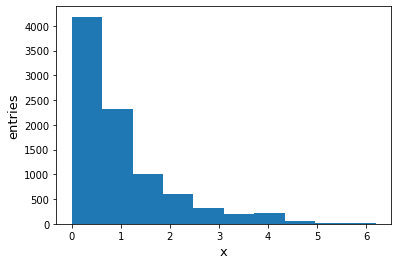

In [89]:
xe = metro_exp(10000,0.2,0,exp_w,1)[0]
plt.hist(xe)
plt.xlabel('x',fontsize = 13)
plt.ylabel('entries',fontsize = 13)

The above plot is the distribution of exponential weight function.

In [90]:
x4 = metropolis(10000,0.2,0,w,1,3)[0]

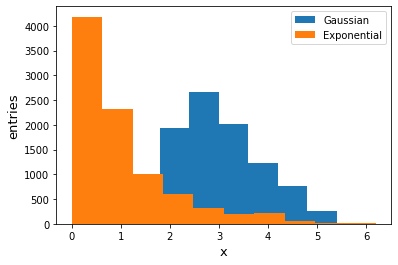

In [96]:
# Comparison plot.
plt.hist(x4)
plt.hist(xe)
plt.xlabel('x',fontsize = 13)
plt.ylabel('entries',fontsize = 13)
plt.legend(['Gaussian','Exponential'])

# Part II

Now, using Gaussian distribution, I will integrate,
$$I = \int_{-\infty}^{\infty}dx e^{-x^2/4}x^2$$

Considering the weight function to be $\omega(x) = e^{-x^2/4}$, we can use metropolis algorithm to generate random numbers and then using those numbers, we can average $x^2$ to get the integral. Since this weight function is not normalised, the normalisation factor should be multiplied to get the end result.

In [120]:
def w1(s,m,x): # weight function for the integration.
    return np.e**(-((x-m)**2)/(2*s*s))

def f(x):
    return x**2

def met_int(N,d,ini,weight,s,m,th): # This is to integrate the function and find the acceptance ratio
    
    # Thermalisation by th steps
    x_th = metropolis(th,d,ini,weight,s,m)[0]
    new_ini = x_th[-1] # last element
    
    met = metropolis(N,d,new_ini,weight,s,m)
    domain = met[0]
    sum_ = 0
    
    #normalization of weight function.
    norm = np.sqrt(4*np.pi)
    
    for i in domain:
        sum_ = sum_ + f(i)
    #plt.hist(domain)
    
    #print(np.max(domain),np.min(domain))
    return [norm*(sum_/np.size(domain)),met[1]]

In [110]:
ans = met_int(100000,0.5,0,w1,np.sqrt(2),0,100000)

print('Integral is ',ans[0])
print('Acceptance ratio is ',ans[1])

Integral is  7.065727996662327
Acceptance ratio is  0.8580314196858031


In [121]:
# Estimation of uncertainty (auto correlation function)
def auto_c(N,d,ini,weight,s,m): # This function will plot the auto correlation function.
    domain = metropolis(N,d,ini,weight,s,m)[0]
    auto = []
    kp = []
    for k in range(100):
        #x_k = domain[k]
        kp.append(k)
        fi = []
        fi2 = []
        fik = []
        for i in range(np.size(domain)):
            fi.append(f(domain[i]))
            fi2.append(f(domain[i])**2)
        for j in range(np.size(domain)-k):
            fik.append(f(domain[j])*f(domain[j+k]))
        fi = np.array(fi)
        fi2 = np.array(fi2)
        fik = np.array(fik)
        auto.append((np.mean(fik)-np.mean(fi)**2)/(np.mean(fi2)-np.mean(fi)**2))
    plt.plot(kp,auto)

Text(0.5, 0, 'k')

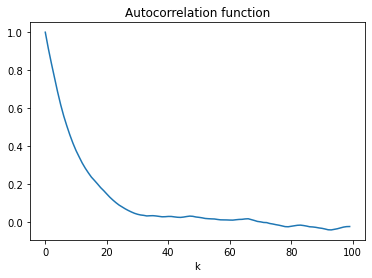

In [122]:
auto_c(10000,0.5,0,w1,np.sqrt(2),0)
plt.title('Autocorrelation function')
plt.xlabel('k')

Study of how the results vary with initial position and number of thermalisation steps.

In [123]:
# analytical value of the integral
val = 4*np.sqrt(np.pi)

# Different initial values
init = [-0.5,-0.2,0,0.4,0.7]
var = [[],[],[]]
for i in init:
    v = met_int(100000,0.5,0,w1,np.sqrt(2),0,100000)
    var[0].append(v[0])
    var[1].append(v[1])
    var[2].append(v[0]-val)

Text(0, 0.5, 'value of integral')

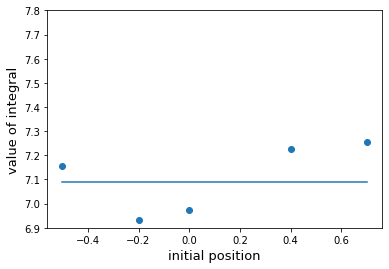

In [124]:
plt.scatter(init,var[0])
plt.plot(init,np.ones(5)*val)
plt.ylim(6.9,7.8)
plt.xlabel('initial position',fontsize=13)
plt.ylabel('value of integral',fontsize = 13)

Text(0, 0.5, 'efficiency')

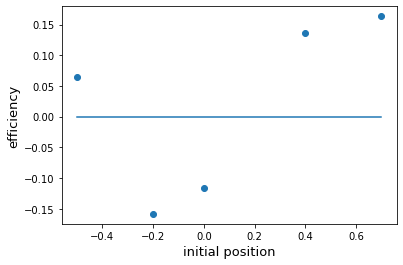

In [125]:
plt.scatter(init,var[2])
plt.plot(init,np.zeros(5))
plt.xlabel('initial position',fontsize=13)
plt.ylabel('efficiency',fontsize = 13)

Text(0, 0.5, 'Auto correlation function')

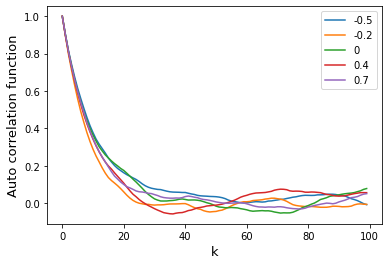

In [120]:
for i in init:
    auto_c(10000,0.5,i,w1,np.sqrt(2),0)
plt.legend(init)
plt.xlabel('k',fontsize=13)
plt.ylabel('Auto correlation function',fontsize = 13)

As seen above, there is not much of a variation of the auto correlation function and the integral value.

On varying the number of thermalisation steps,

In [126]:
# thermalisation steps
thr = [1000,10000,50000,100000,500000]

var1 = [[],[],[]]
for i in thr:
    v = met_int(i,0.5,0,w1,np.sqrt(2),0,100000)
    var1[0].append(v[0])
    var1[1].append(v[1])
    var1[2].append(v[0]-val)

Text(0, 0.5, 'value of integral')

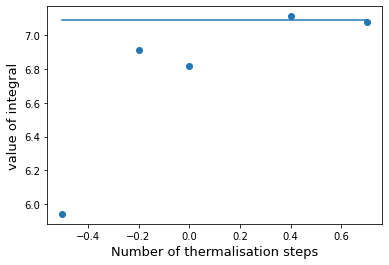

In [128]:
plt.scatter(init,var1[0])
plt.plot(init,np.ones(5)*val)
#plt.ylim(6.9,7.8)
plt.xlabel('Number of thermalisation steps',fontsize=13)
plt.ylabel('value of integral',fontsize = 13)

Text(0, 0.5, 'efficiency')

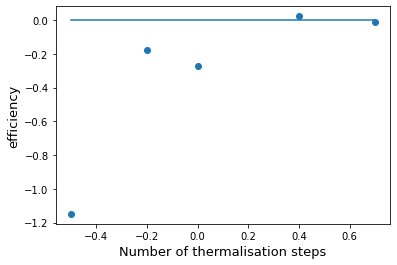

In [130]:
plt.scatter(init,var1[2])
plt.plot(init,np.zeros(5))
plt.xlabel('Number of thermalisation steps',fontsize=13)
plt.ylabel('efficiency',fontsize = 13)

Text(0, 0.5, 'Auto correlation function')

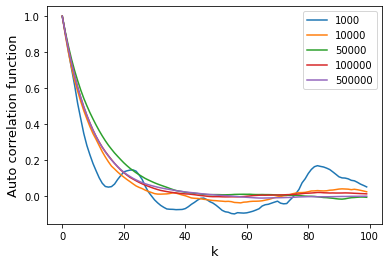

In [131]:
for i in thr:
    auto_c(i,0.5,0,w1,np.sqrt(2),0)
plt.legend(thr)
plt.xlabel('k',fontsize=13)
plt.ylabel('Auto correlation function',fontsize = 13)

From the above plots of the integral value, efficiency and autocorrelation function, it is clear that for more thermalisation steps, we get better results.